In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Logistic Regression

In this part of the exercise, you will build a logistic regression model to
predict whether a student gets admitted into a university. Suppose that you are the administrator of a university department and you want to determine each applicant's chance of admission based on their results on two exams. You have historical data from previous applicants that you can use as a training set for logistic regression. For each training example, you have the applicant's scores on two exams and the admissions decision.

Your task is to build a classification model that estimates an applicant's
probability of admission based the scores from those two exams.

Let's start by examining the data.

In [2]:
data = pd.read_csv('data/ex2data1.txt', 
                   header=None, 
                   names=['exam1', 'exam2', 'admitted'])
data.head()

,exam1,exam2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


### Visualizing the Data

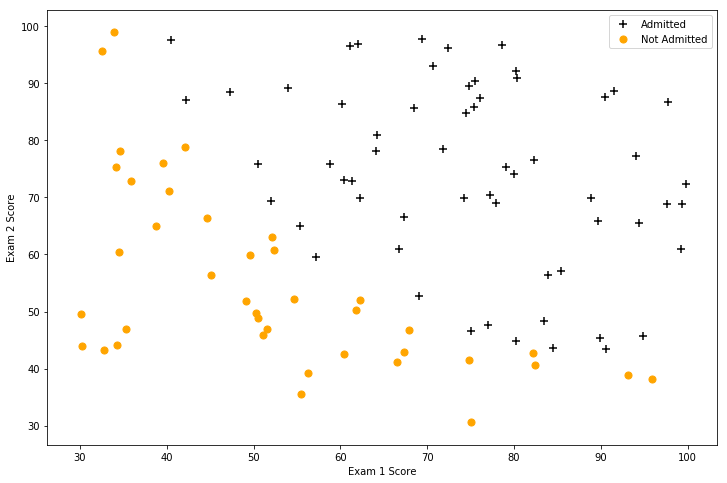

In [3]:
positive = data[data['admitted'] == 1]
negative = data[data['admitted'] == 0]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive.exam1, positive.exam2, s=50, c='black', marker='+', label='Admitted')
ax.scatter(negative.exam1, negative.exam2, s=50, c='orange', marker='o', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score');

### Warmup exercise: Sigmoid Function

In [4]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

### Cost function and gradient

Now you will implement the cost function and gradient for logistic regression.
Complete the code in costFunction.m to return the cost and gradient.

$$ J(\theta) = \frac{1}{m}\sum_{i=1}^m[-y^{(i)}log(h_\theta(x^{(i)}))-(1-y^{(i)})log(1-h_\theta(x^{(i)}))]$$

and the gradient of the cost is a vector of the same length as $\theta$ where the $j$th element (for $j = 0, 1, \dots, n)$ is defined as follows:

$\frac{\partial J(\theta)}{\partial\theta_j} = \frac{1}{m}\sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})x^{(i)}_j$

Note that while this gradient looks identical to the linear regression gra-
dient, the formula is actually different because linear and logistic regression
have different definitions of $h_\theta(x)$.

In [5]:
data.head()

,exam1,exam2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [6]:
data.insert(0, 'inter', 1)

In [7]:
X = np.array(data[['inter', 'exam1', 'exam2']])
y = np.array(data['admitted']).reshape(-1,1)

In [8]:
theta = np.zeros((X.shape[1], 1))

In [9]:
X.shape, theta.shape, y.shape

((100, 3), (3, 1), (100, 1))

In [10]:
def cost(theta, X, y):
    theta = theta.reshape(-1, 1)      
    h = sigmoid(X.dot(theta))
    summation = np.sum(-y.T.dot(np.log(h)) - (1-y).T.dot(np.log(1-h)))
    return summation / X.shape[0]

In [11]:
cost(theta, X, y)

0.6931471805599453

In [12]:
def gradient(theta, X, y):
    theta = theta.reshape(-1, 1)      
    h = sigmoid(X.dot(theta))
    error = np.subtract(h,y)
    grad = X.T.dot(error) / X.shape[0]
    return grad

The actual example uses Octave's fminunc function, python has SciPy's optimize class which we can use to find the optimal parameters.

In [13]:
gradient(theta, X, y)

array([[ -0.1       ],
       [-12.00921659],
       [-11.26284221]])

In [14]:
import scipy.optimize as opt
res = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X, y))

Let's see what the our cost looks like with this solution.

In [15]:
cost(res[0], X, y)

0.20349770158947394

### Evaluating logistic regression

In [16]:
def predict(theta, X):
    h = sigmoid(X.dot(theta))
    return [1 if x >= 0.5 else 0 for x in h]

In [17]:
theta_opt = res[0]
preds = predict(theta_opt, X)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(preds, y)]
accuracy = (sum(map(int, correct)) % len(correct))
print(accuracy)

89


Our logistic regression classifer correctly predicted if a student was admitted or not 89% of the time.  Not bad!  Keep in mind that this is training set accuracy though.  We didn't keep a hold-out set or use cross-validation to get a true approximation of the accuracy so this number is likely higher than its true perfomance (this topic is covered in a later exercise).

## Regularized logistic regression

In this part of the exercise, you will implement regularized logistic regression to predict whether microchips from a fabrication plant passes quality assurance (QA). During QA, each microchip goes through various tests to ensure it is functioning correctly.

Suppose you are the product manager of the factory and you have the test results for some microchips on two different tests. From these two tests, you would like to determine whether the microchips should be accepted or rejected. 

To help you make the decision, you have a dataset of test results on past microchips, from which you can build a logistic regression model.

In [18]:
data2 = pd.read_csv('data/ex2data2.txt', 
                    header=None, 
                    names=['test1', 'test2', 'accepted'])
data2.head()

,test1,test2,accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


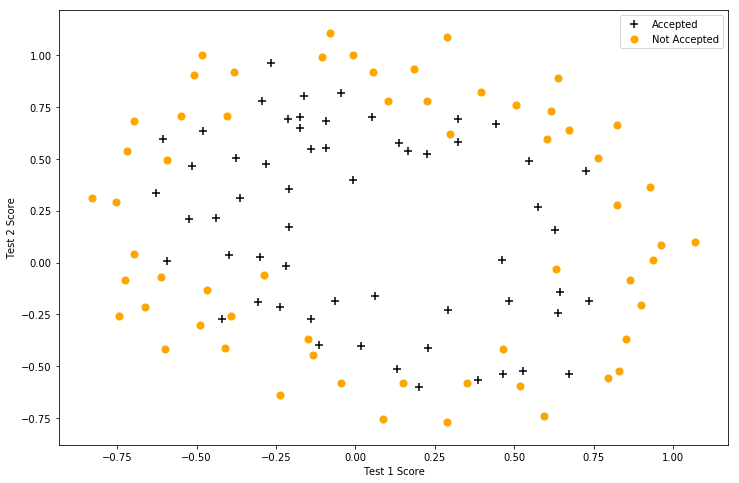

In [19]:
positive = data2[data2['accepted'] == 1]
negative = data2[data2['accepted'] == 0]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive.test1, positive.test2, s=50, c='black', marker='+', label='Accepted')
ax.scatter(negative.test1, negative.test2, s=50, c='orange', marker='o', label='Not Accepted')
ax.legend()
ax.set_xlabel('Test 1 Score')
ax.set_ylabel('Test 2 Score');

In [20]:
from sklearn.preprocessing import PolynomialFeatures

In [21]:
data2.insert(0, 'inter', 1)

In [22]:
X2 = np.array(data2[['inter', 'test1', 'test2']])
y2 = np.array(data2['accepted']).reshape(-1,1)

In [23]:
poly = PolynomialFeatures(6)
X2 = poly.fit_transform(X2)

In [24]:
theta2 = np.zeros((X2.shape[1], 1))

### Cost function and gradient

In [25]:
def costReg(theta, X, y, lam):
    theta = theta.reshape(-1, 1)  
    cost_func = cost(theta, X, y)
    reg_term = (lam/(2*X.shape[0])) * np.sum(theta[1:]**2)
    return cost_func + reg_term

In [26]:
costReg(theta2, X2, y2, 0)

0.6931471805599454

In [27]:
def gradientReg(theta, X, y, lam):
    theta = theta.reshape(-1, 1)  
    grad = gradient(theta, X, y)

    reg_term = (lam/X.shape[0])*theta[1:]
    
    return np.append(grad[0],(grad[1:] + reg_term)).reshape(-1,1)

In [28]:
#gradientReg(theta, X, y, 0)

Now we can use the same optimization function from part 1 to compute the optimal solution.

In [29]:
lam = 1

In [30]:
result2 = opt.fmin_tnc(func=costReg, x0=theta2, fprime=gradientReg, args=(X2, y2, lam))

In [31]:
result2[0]

array([    3.75907248,     3.75907248,     6.40720523,     8.99824849,
           3.75907248,     6.40720523,     8.99824849,   -51.56980727,
         -26.28068451,   -26.55527425,     3.75907248,     6.40720523,
           8.99824849,   -51.56980727,   -26.28068451,   -26.55527425,
         -65.15392717,  -126.48085473,  -104.73938635,   -64.91004472,
           3.75907248,     6.40720523,     8.99824849,   -51.56980727,
         -26.28068451,   -26.55527425,   -65.15392717,  -126.48085473,
        -104.73938635,   -64.91004472,   281.09238454,   300.33769416,
         432.66976264,   208.27945207,   105.6794908 ,     3.75907248,
           6.40720523,     8.99824849,   -51.56980727,   -26.28068451,
         -26.555263  ,   -65.1539372 ,  -126.48085473,  -104.73938635,
         -64.91004472,   281.09238454,   300.33769416,   432.66976264,
         208.27945207,   105.6794908 ,   209.01580586,   524.44397527,
         786.4577165 ,   820.60228943,   480.39273465,   191.02346389,
      

### Predict

In [32]:
theta_opt = result2[0]
predictions = np.array(predict(theta_opt, X2)).reshape(-1,1)
wrong =np.abs(y2-predictions)
accuracy = 100 - wrong.sum()

In [33]:
accuracy

86

### Alternative to Scratch (Scikit-Learn)

In [34]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l2', C=1.0)
lr.fit(X2, y2.ravel());

In [35]:
lr.score(X2, y2)

0.8389830508474576

The scores are pretty similar!